Here we will parse input genomes and annotations for pre-training the model.

## Select input genomes

In [1]:
import os

res_dir = '/work/aelek/projects/splicing/results/00_parse_genomes'
plt_dir = '/work/aelek/projects/splicing/plots/00_parse_genomes'
os.makedirs(res_dir, exist_ok=True)
os.makedirs(plt_dir, exist_ok=True)
dat_dir = '/work/aelek/data/'

### 1. Gencode

Genomes for human and mouse with high-quality manual annotation (includes splice variants):

In [2]:
gencode_genomes = []
for root, dirs, files in os.walk(dat_dir+'gencode/fasta'):
    for file in files:
        if file.endswith('.fa.gz'):
            gencode_genomes.append(os.path.splitext(os.path.splitext(file)[0])[0])

gencode_genomes.sort()
print("Gencode genomes:", len(gencode_genomes))
gencode_genomes

Gencode genomes: 2


['Homo_sapiens', 'Mus_musculus']

### 2. Ensembl
Genomes and automated annotations for mammals (taxonomy/40674):

In [3]:
# ensembl genomes
ensembl_genomes = []
for root, dirs, files in os.walk(dat_dir+'ensembl/fasta'):
    for file in files:
        if file.endswith('.fa.gz'):
            # file name without extension
            ensembl_genomes.append(os.path.splitext(os.path.splitext(file)[0])[0]) 

ensembl_genomes.sort()
print("Ensembl genomes:", len(ensembl_genomes))
ensembl_genomes[0:10]

Ensembl genomes: 128


['Ailuropoda_melanoleuca',
 'Aotus_nancymaae',
 'Balaenoptera_musculus',
 'Bison_bison_bison',
 'Bos_grunniens',
 'Bos_indicus_hybrid',
 'Bos_mutus',
 'Bos_taurus',
 'Bos_taurus_hybrid',
 'Callithrix_jacchus']

### 3. Zoonomia

In [10]:
# Zoonomia genomes
zoo_genomes = []
for root, dirs, files in os.walk(dat_dir+'/zoonomia/genome/'):
    for file in files:
        if file.endswith('.fa'):
            # file name without extension
            sps = os.path.splitext(os.path.splitext(file)[0])[0]
            if sps not in zoo_genomes:
                zoo_genomes.append(sps) 

zoo_genomes.sort()
print("Zoonomia genomes:", len(zoo_genomes))
zoo_genomes[0:10]

Zoonomia genomes: 241


['Acinonyx_jubatus',
 'Acomys_cahirinus',
 'Ailuropoda_melanoleuca',
 'Ailurus_fulgens',
 'Allactaga_bullata',
 'Alouatta_palliata',
 'Ammotragus_lervia',
 'Anoura_caudifer',
 'Antilocapra_americana',
 'Aotus_nancymaae']

### 4. TOGA
Annotations for >600 mammalian genomes from various sources.

In [4]:
import pandas as pd
meta=pd.read_csv(dat_dir+'zoonomia/overview.table.tsv', index_col=0, sep='\t', names=['species', 'common_name', 'taxid', 'lineage', 'assembly_name', 'accession_or_url', 'contig_n50', 'scaffold_n50'])

# Add column with the source of assembly
meta['source'] = meta['accession_or_url']
meta.loc[meta['accession_or_url'].str.contains('http|ftp'), 'source'] = 'link'
meta.loc[meta['accession_or_url'].str.contains('DNA Zoo'), 'source'] = 'Zoonomia'
meta.loc[meta['accession_or_url'].str.startswith('GCF'), 'source'] = 'RefSeq'
meta.loc[meta['accession_or_url'].str.startswith('GCA'), 'source'] = 'GenBank'

# Count the number of genomes per source
source_counts = meta['source'].value_counts()
print(source_counts)

source
GenBank                  431
Zoonomia                 109
RefSeq                    97
T2T primates               6
link                       3
TBG                        2
CNGB Sequence Archive      1
GIGADB                     1
Name: count, dtype: int64


I download GenBank and RefSeq genomes from NCBI, and Zoonomia genomes from TOGA-provided repository (`download_toga_assemblies.sh`).   
The remaining genomes I download manually.

In [5]:
meta.loc[meta['source'].isin(['CNGB Sequence Archive', 'GIGADB', 'TBG', 'link', 'T2T primates'])]

,common_name,taxid,lineage,assembly_name,accession_or_url,contig_n50,scaffold_n50,source
species,,,,,,,,
Acomys cahirinus,Egyptian spiny mouse,10068,Mammalia; Theria; Eutheria; Boreoeutheria; Eua...,HLacoCah2,https://zenodo.org/record/7761277#.ZEKxiRVBwsw,57643754,127770522,link
Balaena mysticetus,bowhead whale,27602,Mammalia; Theria; Eutheria; Boreoeutheria; Lau...,HLbalMys1,http://alfred.liv.ac.uk/downloads/bowhead_whal...,33808,876686,link
Balaenoptera musculus,Blue whale,9771,Mammalia; Theria; Eutheria; Boreoeutheria; Lau...,HLbalMus3,CNGB Sequence Archive,94743,8279331,CNGB Sequence Archive
Eliomys quercinus,garden dormouse,53277,Mammalia; Theria; Eutheria; Boreoeutheria; Eua...,HLeliQue1A,TBG,51740598,108114398,TBG
Eliomys quercinus,garden dormouse,53277,Mammalia; Theria; Eutheria; Boreoeutheria; Eua...,HLeliQue1B,TBG,45399149,107541173,TBG
Gorilla gorilla,western gorilla,9593,Mammalia; Theria; Eutheria; Boreoeutheria; Eua...,HLgorGor7,T2T primates,150804130,150804130,T2T primates
Leptonycteris yerbabuenae,Lesser long-nosed bat,700936,Mammalia; Theria; Eutheria; Boreoeutheria; Lau...,HLlepYer1,GIGADB,37711,14735151,GIGADB
Loxodonta africana,African savanna elephant,9785,Mammalia; Theria; Eutheria; Afrotheria; Probos...,HLloxAfr4,ftp://ftp.broadinstitute.org/pub/assemblies/ma...,65481,94531929,link
Pan paniscus,pygmy chimpanzee,9597,Mammalia; Theria; Eutheria; Boreoeutheria; Eua...,HLpanPan4,T2T primates,147028407,147028407,T2T primates


In [6]:
meta.loc[meta.index=="Balaena mysticetus"]['accession_or_url']

species
Balaena mysticetus    http://alfred.liv.ac.uk/downloads/bowhead_whal...
Name: accession_or_url, dtype: object

Count downloaded TOGA-annotated genomes per species.

In [23]:
# TOGA genomes
toga_genomes = []
for root, dirs, files in os.walk(dat_dir+'/zoonomia/ncbi/fasta'):
    for file in files:
        if file.endswith('.fa.gz'):
            # file name without extension
            sps_asn = os.path.splitext(os.path.splitext(file)[0])[0]
            sps, asn = sps_asn.split('__')
            if sps not in toga_genomes:
                toga_genomes.append(sps) 

toga_genomes.sort()
print("TOGA genomes:", len(toga_genomes))
toga_genomes[0:10]

TOGA genomes: 467


['Acinonyx_jubatus',
 'Acomys_cahirinus',
 'Acomys_dimidiatus',
 'Acomys_russatus',
 'Aepyceros_melampus',
 'Ailuropoda_melanoleuca',
 'Ailurus_fulgens',
 'Alces_alces',
 'Allactaga_bullata',
 'Allenopithecus_nigroviridis']

### All genomes
Next, compare how many genomes are overlapping between Gencode, Ensembl and TOGA.

Total unique genomes: 550


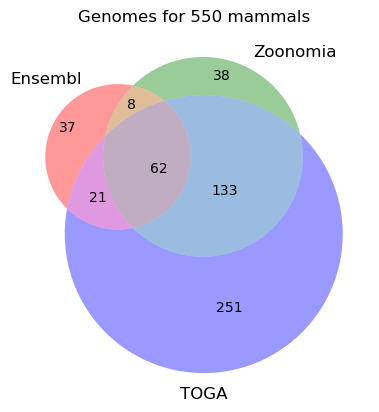

In [24]:
# Unique set of genomes from ensembl and zoonomia
all_genomes = set(ensembl_genomes + zoo_genomes + toga_genomes)
all_genomes = sorted(all_genomes)
print(f'Total unique genomes: {len(all_genomes)}')

import matplotlib.pyplot as plt
from matplotlib_venn import venn3

venn3([set(ensembl_genomes), set(zoo_genomes), set(toga_genomes)],
      ('Ensembl', 'Zoonomia', 'TOGA'))
plt.title(f'Genomes for {len(all_genomes)} mammals')
plt.savefig(plt_dir + '/genome_overlap.png')
plt.show()

In [16]:
for genome in zoo_genomes:
    if genome not in toga_genomes:
        print(f'{genome}')

Balaenoptera_acutorostrata
Bison_bison
Callicebus_donacophilus
Canis_lupus
Capromys_pilorides
Cebus_capucinus
Ceratotherium_simum
Chaetophractus_vellerosus
Colobus_angolensis
Crocidura_indochinensis
Cuniculus_paca
Desmodus_rotundus
Dicerorhinus_sumatrensis
Enhydra_lutris
Gorilla_gorilla
Homo_sapiens
Loxodonta_africana
Marmota_marmota
Megaderma_lyra
Murina_feae
Neophocaena_asiaeorientalis
Orycteropus_afer
Panthera_tigris
Perognathus_longimembris
Peromyscus_maniculatus
Spilogale_gracilis
Suricata_suricatta
Sus_scrofa
Tadarida_brasiliensis
Tamandua_tetradactyla
Tapirus_indicus
Tapirus_terrestris
Thryonomys_swinderianus
Tolypeutes_matacus
Tonatia_saurophila
Tragulus_javanicus
Trichechus_manatus
Tupaia_chinensis
Tupaia_tana
Tursiops_truncatus
Uropsilus_gracilis
Ursus_maritimus
Vicugna_pacos
Vulpes_lagopus
Xerus_inauris
Zalophus_californianus
Zapus_hudsonius
Ziphius_cavirostris


TOGA annotation often use different chromosome names. How many of TOGA names we can map to genomes?

Genomes with mapped TOGA annotation: 59
Total unique genomes: 172


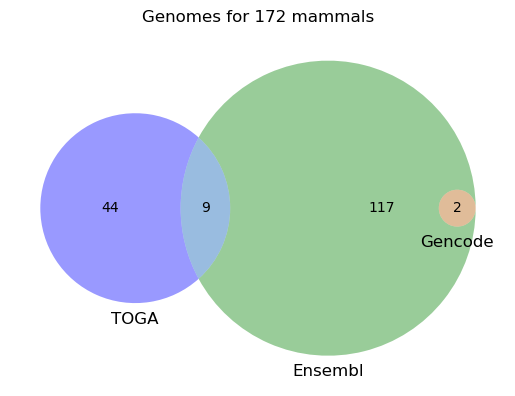

In [11]:
# toga annotated genomes
toga_annotated_genomes = []
for root, dirs, files in os.walk(dat_dir+'/zoonomia/toga_mapped'):
    for file in files:
        if file.endswith('.gtf.gz'):
            # file name without extension
            sps_asn = os.path.splitext(os.path.splitext(file)[0])[0]
            sps, asn = sps_asn.split('__')
            toga_annotated_genomes.append(sps) 

toga_annotated_genomes.sort()
print("Genomes with mapped TOGA annotation:", len(toga_annotated_genomes))

all_genomes = set(gencode_genomes + ensembl_genomes + toga_annotated_genomes)
all_genomes = sorted(all_genomes)
print(f'Total unique genomes: {len(all_genomes)}')

import matplotlib.pyplot as plt
from matplotlib_venn import venn3

venn3([set(gencode_genomes), set(ensembl_genomes), set(toga_annotated_genomes)],
      ('Gencode', 'Ensembl', 'TOGA'))
plt.title(f'Genomes for {len(all_genomes)} mammals')
plt.savefig(plt_dir + '/genome_annot_overlap.png')
plt.show()

I will use Gencode for human and mouse, all Ensembl genomes, and supplement with additional ones from TOGA.

In [7]:
# make a dictionary mapping between genome names and their respective fasta, fai, and gtf files
genome_dict = {}

for sp in all_genomes:
    if sp in gencode_genomes:
        source_sp = 'gencode'
        fasta_fn = f'{dat_dir}/gencode/fasta/{sp}.fa.gz'
        fai_fn = f'{dat_dir}/gencode/fasta/{sp}.fa.gz.fai'
        gtf_fn = f'{dat_dir}/gencode/gtf/{sp}.gtf.gz'
    elif sp in ensembl_genomes:
        source_sp = 'ensembl'
        fasta_fn = f'{dat_dir}/ensembl/fasta/{sp}.fa.gz'
        fai_fn = f'{dat_dir}/ensembl/fasta/{sp}.fa.gz.fai'
        gtf_fn = f'{dat_dir}/ensembl/gtf/{sp}.gtf.gz'
    elif sp in toga_zoonomia_genomes:
        source_sp = 'zoonomia'
        fasta_fn = f'{dat_dir}/zoonomia/fasta/{sp}.fa'
        fai_fn = f'{dat_dir}/zoonomia/fasta/{sp}.fa.fai'
        gtf_fn = f'{dat_dir}/zoonomia/gtf/{sp}.gtf.gz'
    else:
        print(f"{sp} not found in any database.")

    # Check if files exist
    for fn in [fasta_fn, fai_fn, gtf_fn]:
        if not os.path.exists(fn):
            print(f"Warning: {fn} does not exist.")
    
    # Add to the dictionary
    genome_dict[sp] = {
        'source': source_sp,
        'fasta': fasta_fn,
        'fai': fai_fn,
        'gtf': gtf_fn
    }

Quantify sources of genomes

In [ ]:
# Count different genome sources
source_counts = {}
for sp in genome_dict:
    source = genome_dict[sp]['source']
    if source not in source_counts:
        source_counts[source] = 0
    source_counts[source] += 1

print("Genome sources:")
for source, count in source_counts.items():
    print(f"{source}: {count}")


TO-DO: 
- try to inspect and improve species and chr mapping 
- compare assembly/annotations between Ensembl and Zoonomia/TOGA

## QC filtering of genome annotations

We will only keep:

- protein coding genes
- use TSL or other quality flags if available.

In [12]:
gtf_fn = genome_dict['Homo_sapiens']['gtf']

# Read annotations gtf_fn


'/work/aelek/data//gencode/gtf/Homo_sapiens.gtf.gz'